# Affine and second degree polynomial regression

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

class Gradient_Descent:
    
    def __init__(self, parameter_a, parameter_b, parameter_c, regtype='linear', test_size=100, lr=0.0000001, nb_iters=80, noise=False):
        
        self.test_size = test_size
        
        self.parameter_a = parameter_a
        self.parameter_b = parameter_b
        self.parameter_c = parameter_c
        self.regtype = regtype
        self.mse_hist=[]
        
        self.param_a_hist = []
        self.param_b_hist = []
        self.param_c_hist = []

        self.noise = noise
        
        self.X = np.random.randint(-10, 10, (self.test_size, 1)) + np.random.normal(loc=0, scale=1, size=(self.test_size, 1))
       
        if noise == True:
            self.e = 5*(np.random.normal(loc=0, scale=1, size=(self.test_size, 1)))
        else:
            self.e = np.zeros((self.test_size, 1))
            
        self.y = self.parameter_a*(self.X*self.X) + self.parameter_b*self.X + self.parameter_c + self.e
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=42)
        
        if self.parameter_a != 0:
            self.param_a = np.random.randint(0, 10)
        else:
            self.param_a = 0
        self.param_b = np.random.randint(0, 10)
        self.param_c = np.random.randint(0, 10)
        
        self.lr = lr
        self.length = nb_iters
        
        
    def optimize(self):
        if self.regtype == 'quadratic':
            for iteration in range(self.length):
                pred = []
            
                x = np.dot((self.X_train*self.X_train), self.param_a) + np.dot(self.X_train, self.param_b) + self.param_c
            
                pred.append(x)
                pred = np.array(pred).reshape(self.y_train.shape[0],1)

                error = np.subtract(pred, self.y_train)
                mse = mean_squared_error(self.y_train, pred)
                self.mse_hist.append(mse)  
            
                param_a_slope = (np.dot((self.X_train*self.X_train).T, error))/self.y_train.shape[0]
                for iter_1 in range(1500):
                    self.param_a = self.param_a - self.lr*param_a_slope*5
                self.param_a_hist.append(self.param_a)
            
                param_b_slope = (np.dot(self.X_train.T, error))/self.y_train.shape[0]
                for iter_2 in range(4500):
                    self.param_b = self.param_b - self.lr*param_b_slope*10
                self.param_b_hist.append(self.param_b)
            
                param_c_slope = error/self.y_train.shape[0]
                for iter_3 in range(5000):
                    for slope_bias_value in param_c_slope:
                        self.param_c = self.param_c - self.lr*slope_bias_value*15
                self.param_c_hist.append(self.param_c)

            
                plt.scatter(self.X_train, self.y_train)
                t = np.linspace(-10, 10, 400)
                actual = self.parameter_a*(t**2) + self.parameter_b*(t) + self.parameter_c
                prediction = float(self.param_a)*(t**2) + float(self.param_b)*(t) + float(self.param_c)
                plt.plot(t, prediction, color='green', markersize=1)
                
        
            plt.plot(t, actual, 'r', label="Actual") 
            plt.plot(t, prediction, 'b', label='Prediction')
            plt.legend()
            plt.show()
        
            self.param_a_hist=list(np.array(self.param_a_hist).reshape(self.length,))
            self.param_b_hist=list(np.array(self.param_b_hist).reshape(self.length,))
            self.param_c_hist=list(np.array(self.param_c_hist).reshape(self.length,))
            
        elif self.regtype == 'linear':
            for iteration in range(self.length):
                pred = []
            
                x = np.dot(self.X_train, self.param_b) + self.param_c
            
                pred.append(x)
                pred = np.array(pred).reshape(self.y_train.shape[0],1)

                error = np.subtract(pred, self.y_train)
                mse = mean_squared_error(self.y_train, pred)
                self.mse_hist.append(mse)  
            
                param_b_slope = (np.dot(self.X_train.T, error))/self.y_train.shape[0]
                for iter_2 in range(1500):
                    self.param_b = self.param_b - self.lr*param_b_slope*100
                self.param_b_hist.append(self.param_b)
            
                param_c_slope = error/self.y_train.shape[0]
                for iter_3 in range(5000):
                    for slope_bias_value in param_c_slope:
                        self.param_c = self.param_c - self.lr*slope_bias_value*500
                self.param_c_hist.append(self.param_c)

            
                plt.scatter(self.X_train, self.y_train)
                t = np.linspace(-10, 10, 400)
                actual = self.parameter_b*(t) + self.parameter_c
                prediction = float(self.param_b)*(t) + float(self.param_c)
                plt.plot(t, prediction, color='green', markersize=0.2)
        
            plt.plot(t, actual, 'r', label="Actual") 
            plt.plot(t, prediction, 'b', label="Prediction")
            plt.legend()
            plt.show()

            self.param_b_hist=list(np.array(self.param_b_hist).reshape(self.length,))
            self.param_c_hist=list(np.array(self.param_c_hist).reshape(self.length,))
            
    
    
    def plot_data(self):
        plt.scatter(self.X_train, self.y_train, label=str(self.parameter_a)+'x² +'+ str(self.parameter_b)+'x + ' +str(self.parameter_c))
        plt.legend()
        plt.show()
        
    def plot_params(self):
        plt.plot(self.param_a_hist, label='Parameter a')
        plt.plot(self.param_b_hist, label='Parameter b')
        plt.plot(self.param_c_hist, label='Parameter c')
        plt.legend()
        plt.show()
   
    def r2_score(self):
        self.y_pred = np.dot((self.X_test*self.X_test), self.param_a) + np.dot(self.X_test, self.param_b) + self.param_c
        score = r2_score(self.y_test, self.y_pred)
        print(score)
    
    def params(self):
        print("Parameter a: " + str(float(self.param_a)))
        print("Parameter b: " + str(float(self.param_b)))
        print("Parameter c: " + str(float(self.param_c)))

In [153]:
noiseless_linear = Gradient_Descent(0, -3, 2, regtype='linear')

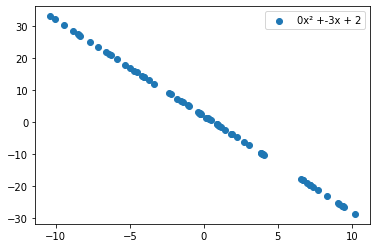

In [154]:
noiseless_linear.plot_data()

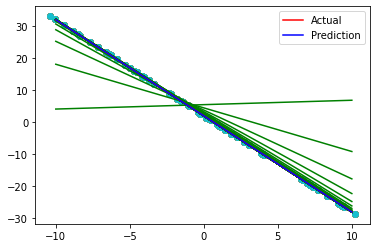

In [155]:
noiseless_linear.optimize()

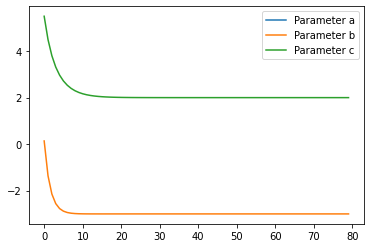

In [156]:
noiseless_linear.plot_params()

In [157]:
noiseless_linear.r2_score()

1.0


In [158]:
noiseless_linear.params()

Parameter a: 0.0
Parameter b: -3.000000000004507
Parameter c: 2.000000000387854


In [164]:
noisy_linear = Gradient_Descent(0, 3, 5, regtype='linear', noise=True)

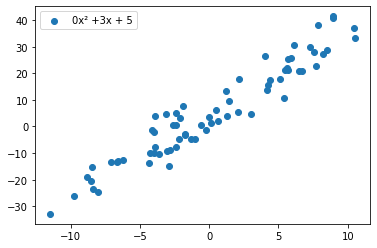

In [165]:
noisy_linear.plot_data()

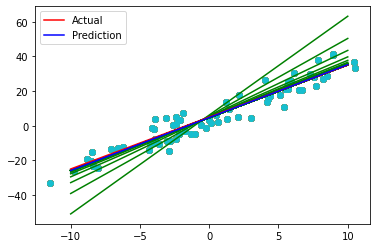

In [166]:
noisy_linear.optimize()

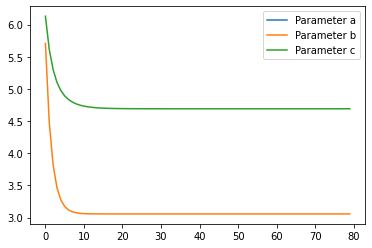

In [167]:
noisy_linear.plot_params()

In [168]:
noisy_linear.r2_score()

0.8915140088288923


In [169]:
noisy_linear.params()

Parameter a: 0.0
Parameter b: 3.0558975319756527
Parameter c: 4.691242389592503


In [176]:
noiseless_polynomial = Gradient_Descent(-2, 3, 4, regtype='quadratic')

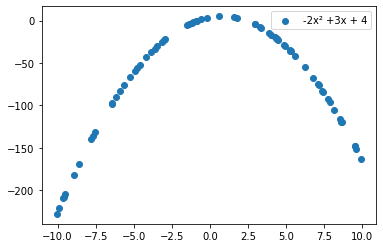

In [177]:
noiseless_polynomial.plot_data()

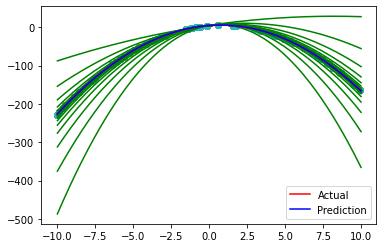

In [178]:
noiseless_polynomial.optimize()

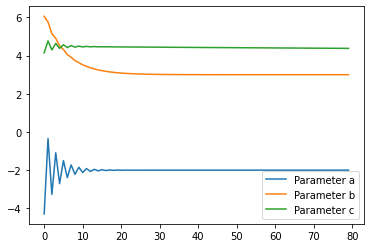

In [179]:
noiseless_polynomial.plot_params()

In [180]:
noiseless_polynomial.r2_score()

0.9999836807102164


In [181]:
noiseless_polynomial.params()

Parameter a: -2.006029707415166
Parameter b: 2.9978631363217705
Parameter c: 4.377834448854863


In [190]:
noisy_polynomial = Gradient_Descent(1, -3, 5, regtype='quadratic', noise=True)

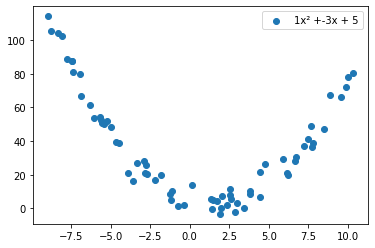

In [191]:
noisy_polynomial.plot_data()

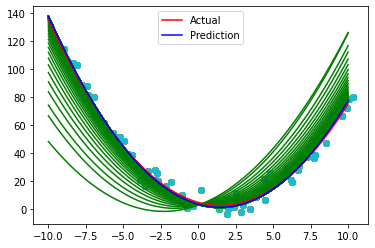

In [192]:
noisy_polynomial.optimize()

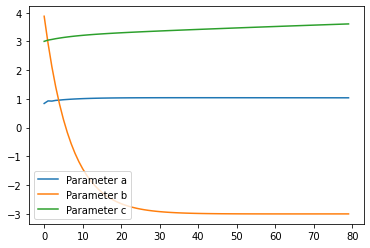

In [193]:
noisy_polynomial.plot_params()

In [194]:
noisy_polynomial.r2_score()

0.9642132230608758


In [195]:
noisy_polynomial.params()

Parameter a: 1.0375449852831538
Parameter b: -3.0052230657855437
Parameter c: 3.6100201119529913
